In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_dataframes(file_pattern):
    return pd.concat([pd.read_csv(file) for file in glob.glob(file_pattern)], sort=False)


def aggregate_score(dataframe, func, name_column='Name'):
    return dataframe.groupby(name_column).agg(func).reset_index()


In [3]:
output_dir = 'config100'
dir_path = 'outputs/' + output_dir +'/'

df = read_dataframes(f'{dir_path}*.csv')
df_mean = aggregate_score(df, np.mean)
df_std = aggregate_score(df, np.std)

In [4]:
df.head()

,Accuracy,Cost,F1,Name,Precision,Recall,Savings
0,0.999214,24791.51,0.736842,CI-LogisticRegression,0.875000,0.636364,-0.026432
1,0.998952,28349.12,0.691358,CI-DecisionTree,0.704403,0.678788,-0.173726
2,0.999392,22971.77,0.804054,CI-RandomForest,0.908397,0.721212,0.048910
3,0.999392,23834.34,0.810458,CI-XGBoost,0.879433,0.751515,0.013197
4,0.939347,590169.04,0.014643,CST-CostSensitiveLogisticRegression,0.007533,0.260606,-23.434515


In [5]:
df_mean.head()

,Name,Accuracy,Cost,F1,Precision,Recall,Savings
0,CI-DecisionTree,0.999097,23768.4356,0.738904,0.739747,0.738909,-0.174903
1,CI-DecisionTree-BMR,0.998397,13278.2994,0.227399,0.684903,0.136848,0.348899
2,CI-DecisionTree-TO,0.999097,23768.4356,0.738904,0.739747,0.738909,-0.174903
3,CI-LogisticRegression,0.999184,22221.0004,0.724999,0.868134,0.623879,-0.092876
4,CI-LogisticRegression-BMR,0.998470,11813.6956,0.268936,0.777131,0.163394,0.419984


In [6]:
results = pd.DataFrame(df_mean.Name.str.split('-').values.tolist(), columns=['Model class', 'Model', 'Extra model'])
results = pd.concat([df_mean, results], axis = 1)
results = results.drop(['Name'], axis = 1)

In [7]:
results.sort_values('Savings')

,Accuracy,Cost,F1,Precision,Recall,Savings,Model class,Model,Extra model
13,0.535900,4.437532e+06,0.004711,0.002377,0.456606,-221.493929,CST,CostSensitiveLogisticRegression,None
0,0.999097,2.376844e+04,0.738904,0.739747,0.738909,-0.174903,CI,DecisionTree,None
2,0.999097,2.376844e+04,0.738904,0.739747,0.738909,-0.174903,CI,DecisionTree,TO
5,0.999029,2.328852e+04,0.640864,0.868205,0.520242,-0.143475,CI,LogisticRegression,TO
3,0.999184,2.222100e+04,0.724999,0.868134,0.623879,-0.092876,CI,LogisticRegression,None
11,0.999180,2.117776e+04,0.660586,0.932351,0.563636,-0.043281,CI,XGBoost,TO
8,0.999177,2.101301e+04,0.686103,0.944654,0.570061,-0.036750,CI,RandomForest,TO
9,0.999492,2.039951e+04,0.840999,0.917360,0.777333,-0.005981,CI,XGBoost,None
12,0.998271,2.048991e+04,0.000000,0.000000,0.000000,0.000000,CST,CostSensitiveDecisionTreeClassifier,None
6,0.999471,1.991423e+04,0.829949,0.932926,0.748242,0.018425,CI,RandomForest,None


In [8]:
results.sort_values(['Model', 'Savings'])

,Accuracy,Cost,F1,Precision,Recall,Savings,Model class,Model,Extra model
12,0.998271,2.048991e+04,0.000000,0.000000,0.000000,0.000000,CST,CostSensitiveDecisionTreeClassifier,None
13,0.535900,4.437532e+06,0.004711,0.002377,0.456606,-221.493929,CST,CostSensitiveLogisticRegression,None
0,0.999097,2.376844e+04,0.738904,0.739747,0.738909,-0.174903,CI,DecisionTree,None
2,0.999097,2.376844e+04,0.738904,0.739747,0.738909,-0.174903,CI,DecisionTree,TO
1,0.998397,1.327830e+04,0.227399,0.684903,0.136848,0.348899,CI,DecisionTree,BMR
5,0.999029,2.328852e+04,0.640864,0.868205,0.520242,-0.143475,CI,LogisticRegression,TO
3,0.999184,2.222100e+04,0.724999,0.868134,0.623879,-0.092876,CI,LogisticRegression,None
4,0.998470,1.181370e+04,0.268936,0.777131,0.163394,0.419984,CI,LogisticRegression,BMR
8,0.999177,2.101301e+04,0.686103,0.944654,0.570061,-0.036750,CI,RandomForest,TO
6,0.999471,1.991423e+04,0.829949,0.932926,0.748242,0.018425,CI,RandomForest,None


In [9]:
df_std

,Name,Accuracy,Cost,F1,Precision,Recall,Savings
0,CI-DecisionTree,0.000108,2.174702e+03,0.030461,0.034780,0.035505,0.137200
1,CI-DecisionTree-BMR,0.000052,2.025821e+03,0.034559,0.080519,0.023363,0.071132
2,CI-DecisionTree-TO,0.000108,2.174702e+03,0.030461,0.034780,0.035505,0.137200
3,CI-LogisticRegression,0.000064,2.281602e+03,0.027487,0.025677,0.041003,0.086480
4,CI-LogisticRegression-BMR,0.000051,1.659137e+03,0.035248,0.072425,0.024852,0.064005
5,CI-LogisticRegression-TO,0.000170,2.676734e+03,0.097688,0.035283,0.123378,0.085861
6,CI-RandomForest,0.000062,1.998230e+03,0.021619,0.023588,0.031793,0.098297
7,CI-RandomForest-BMR,0.000055,1.724473e+03,0.033276,0.071128,0.024223,0.060739
8,CI-RandomForest-TO,0.000276,2.140259e+03,0.146093,0.061579,0.193100,0.113693
9,CI-XGBoost,0.000061,1.909531e+03,0.020120,0.027296,0.030753,0.100667


In [10]:
df.sort_values(['Name', 'Savings'])

,Accuracy,Cost,F1,Name,Precision,Recall,Savings
1,0.999057,22943.66,0.718750,CI-DecisionTree,0.741935,0.696970,-0.410201
1,0.999036,22311.87,0.730994,CI-DecisionTree,0.706215,0.757576,-0.403384
1,0.999287,20672.30,0.792683,CI-DecisionTree,0.797546,0.787879,-0.399334
1,0.999151,21308.01,0.750769,CI-DecisionTree,0.762500,0.739394,-0.399227
1,0.998879,27663.40,0.691643,CI-DecisionTree,0.659341,0.727273,-0.397033
1,0.998899,31328.11,0.702550,CI-DecisionTree,0.659574,0.751515,-0.367085
1,0.999004,23994.04,0.718101,CI-DecisionTree,0.703488,0.733333,-0.360585
1,0.999088,20667.94,0.733945,CI-DecisionTree,0.740741,0.727273,-0.357896
1,0.999057,24592.81,0.735294,CI-DecisionTree,0.714286,0.757576,-0.331840
1,0.998973,24878.72,0.706587,CI-DecisionTree,0.698225,0.715152,-0.313642


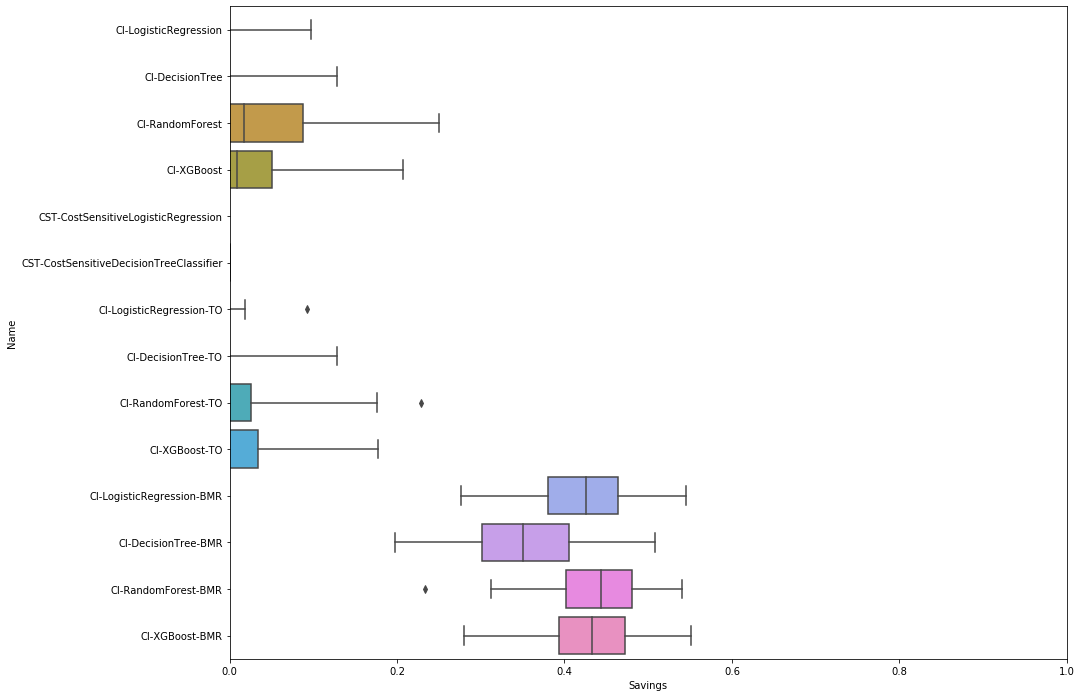

In [11]:
data = df #[df['Savings'] > 0]

fig, ax = plt.subplots(figsize = (15, 12))

sns.boxplot(x = 'Savings', y = 'Name', data = data, ax = ax)
ax.set_xlim([0, 1])
plt.show()